<a href="https://colab.research.google.com/github/jpmarques-97/MachineLearning_study/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from matplotlib import style
from statistics import stdev 
from statistics import mean

In [0]:
def cost(theta,x,y):
  m = len(x)
  if m != len(y):
    return "please use the same length of x and y"
  custo = np.array(0,dtype='float64').reshape(1,1)
  for i,item in enumerate(x):
     custo += (h(theta,item.reshape(2,1))-y[i])**2 
  return custo*(1/(2*m))

In [0]:
def h(theta,x):
  theta = np.transpose(np.matrix(theta))
  predict = np.matmul(theta,x)

  return predict

In [0]:
def gradientDescent(theta,alpha,x,y,itherations):
  param = {'cost':[],'n_iter':[]}  
  for i in range(itherations):
    param['n_iter'].append(i)
    for j,item in enumerate(theta):
      delta = 0 
      for i,item in enumerate(x):
        delta += (h(theta,item.reshape(2,1))-y[i])*x[i][j]*alpha/len(x)
      theta[j] = theta[j] - delta
    param['cost'].append(float(cost(theta,x,y)))
  return theta, param

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Coursera/Week2_data"

ex1data1.txt  ex1data2.txt


In [0]:
data = pd.read_csv('/content/drive/My Drive/Coursera/Week2_data/ex1data1.txt', header = None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


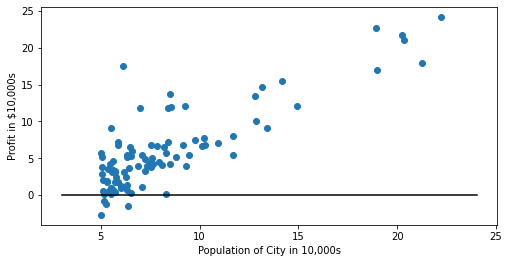

In [0]:
f = plt.figure(figsize=(18,4))
ax = f.add_subplot(121)
ax.scatter(data[0],data[1])
x_axis = np.arange(np.min(data[0])-2,np.max(data[0])+2,1)
ax.plot(x_axis,np.zeros((len(x_axis),1)),'black')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');
f.show()

In [0]:
theta = np.zeros((2,1))
itherations = 1500
alpha = 0.01
tamanho = len(data[0])
uns = np.ones((tamanho,1))
x = np.array(data[0]).reshape(tamanho,1)
y = np.array(data[1]).reshape(tamanho,1)
x = np.concatenate((uns,x),axis=1)

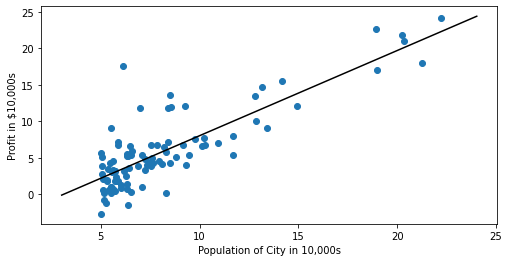

In [0]:
theta,param = gradientDescent(theta,alpha,x,y,1500)
f = plt.figure(figsize=(18,4))
ax = f.add_subplot(121)
ax.scatter(data[0],data[1])
x_axis = np.arange(np.min(data[0])-2,np.max(data[0])+2,1)
y_axis = theta[0]  + theta[1]*x_axis
ax.plot(x_axis,y_axis,'black')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');
f.show()

In [0]:
theta1 = np.arange(-1,2,10/100)
theta2 = np.arange(-1,2,10/100)
z = np.zeros((100,1))
for i,item in enumerate(theta1):
  theta_test = np.array([theta1[i],theta2[i]]).reshape(2,1)
  z[i] = cost(theta_test,x,y)


In [0]:
data2 = pd.read_csv('/content/drive/My Drive/Coursera/Week2_data/ex1data2.txt', header = None)
data2.insert(0,'bias',np.ones((len(data2),1)))
data2[0] = (data2[0]-mean(data2[0]))/stdev(data2[0])
data2[1] = (data2[1]-mean(data2[1]))/stdev(data2[1])

data2.head()

,bias,0,1,2
0,1.0,0.130010,-0.223675,399900
1,1.0,-0.504190,-0.223675,329900
2,1.0,0.502476,-0.223675,369000
3,1.0,-0.735723,-1.537767,232000
4,1.0,1.257476,1.090417,539900


In [0]:
x = np.array([data2['bias'],data2[0],data2[1]])
a,b = x.shape
y = np.array(data2[2]).reshape(b,1)
theta = np.zeros((a,1))


In [0]:
def cost(theta,x,y):
  z = np.matmul((h(theta,x) - y.T),(h(theta,x) - y.T).T)
  return z/(len(x)*2)

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def gradientDescent(theta,alpha,x,y,itherations):
  param = {'cost':[],'n_iter':[]}  
  for i in range(itherations):
    param['n_iter'].append(i)
    for j,item in enumerate(theta):
      delta = 0 
      for i,item in enumerate(x):
        delta += (h(theta,item.reshape(3,1))-y[i])*x.T[j][i]*alpha/len(x)
      theta[j] = theta[j] - delta
    param['cost'].append(float(cost(theta,x.T,y)))
  return theta, param

In [0]:
theta,param = gradientDescent(theta,0.3,x.T,y,80)


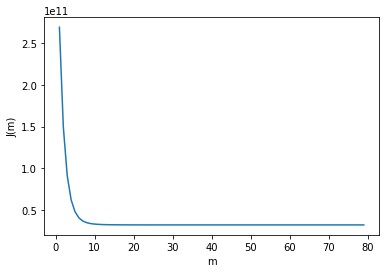

In [0]:
plt.plot(param['n_iter'][1:],param['cost'][1:])
plt.xlabel('m')
plt.ylabel('J(m)')
plt.show()